# Exercises

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.

In [1]:
# standard imports
# ignore warnings
import os
from env import get_connection
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

# possible modules, may just wrangle like before
import wrangle
import summarize

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.shape

(35450, 41)

In [4]:
summarize.summarize(df)

Shape of Data: 
(35450, 41)
Info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35450 entries, 3 to 52318
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            35450 non-null  int64  
 1   parcelid                      35450 non-null  int64  
 2   airconditioningtypeid         13534 non-null  float64
 3   bathroomcnt                   35450 non-null  float64
 4   bedroomcnt                    35450 non-null  float64
 5   buildingqualitytypeid         32856 non-null  float64
 6   calculatedbathnbr             35449 non-null  float64
 7   calculatedfinishedsquarefeet  35450 non-null  float64
 8   finishedsquarefeet12          35447 non-null  float64
 9   fips                          35450 non-null  float64
 10  fullbathcnt                   35449 non-null  float64
 11  garagecarcnt                  2487 non-null   float64
 12  garagetotalsqft          

In [5]:
train, val, test = wrangle.train_val_test(df)

In [6]:
train.head()

,id,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,airconditioningdesc,heatingorsystemdesc,propertylandusedesc
38466,33269,11317293,1.00,2.00,4.00,6.00,2.00,"1,640.00","1,640.00","6,037.00",...,"158,201.00","2,016.00","27,507.00","2,838.02","60,379,012,051,004.00",0.04,2017-07-13,Central,Central,Single Family Residential
37530,1304689,12333762,NaN,1.00,2.00,4.00,1.00,"1,320.00","1,320.00","6,037.00",...,"215,848.00","2,016.00","130,173.00","2,743.54","60,375,513,002,010.00",0.05,2017-07-10,NaN,Floor/Wall,Single Family Residential
50774,101089,14169798,13.00,4.00,4.00,NaN,4.00,"2,984.00","2,984.00","6,059.00",...,"516,781.00","2,016.00","292,968.00","6,245.76","60,590,117,093,008.00",0.01,2017-09-11,Yes,NaN,Single Family Residential
11372,828071,12484444,NaN,1.00,3.00,4.00,1.00,"1,122.00","1,122.00","6,037.00",...,"481,000.00","2,016.00","382,000.00","5,896.55","60,375,709,021,010.00",0.01,2017-03-15,NaN,Floor/Wall,Single Family Residential
11187,1896038,10855522,NaN,2.00,3.00,6.00,2.00,"1,646.00","1,646.00","6,037.00",...,"743,000.00","2,016.00","594,000.00","8,938.71","60,371,289,103,010.00",-0.04,2017-03-14,NaN,Floor/Wall,Single Family Residential


1. What is the distribution of each of the variables?

In [7]:
# sns.pairplot(data=train)
# plt.show

Q1. "Is there a relationship in tax amount and log error?

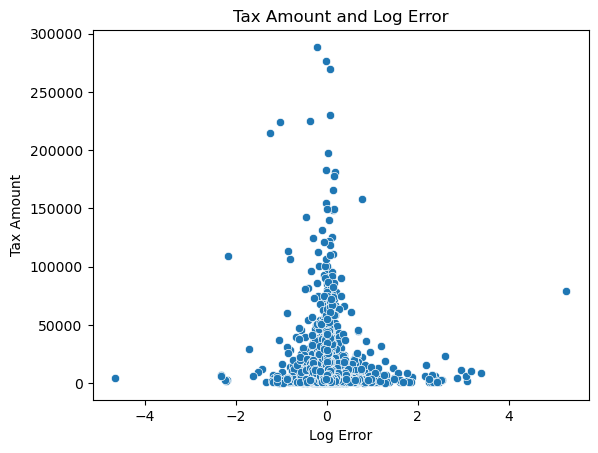

In [11]:
sns.scatterplot(x=train.logerror, y=train.taxamount	)
plt.title("Tax Amount and Log Error")
plt.xlabel("Log Error")
plt.ylabel("Tax Amount")
plt.show()

## Takeaway:
- There seems to be a strong cetralization of tax amount when it is on the low end of and shows a type of correlation between these two features.
- there may not be a relationship becasue it's very concentrated and centered around 0.

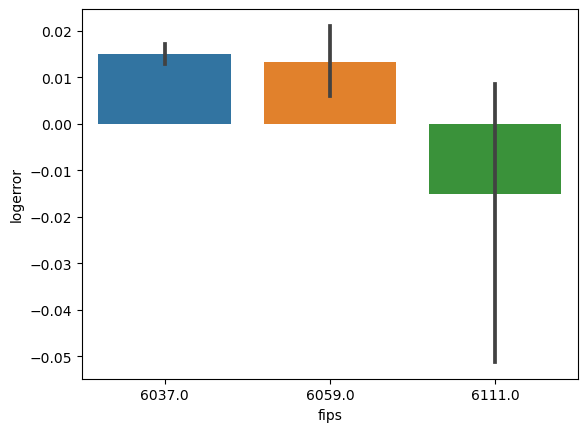

In [13]:
sns.barplot(data=train, x='fips', y='logerror')
plt.show()

# Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.